# Gun Detection

## Importing Dataset from Github

In [2]:
!git clone https://github.com/ari-dasci/OD-WeaponDetection.git

Cloning into 'OD-WeaponDetection'...
remote: Enumerating objects: 50755, done.
remote: Total 50755 (delta 0), reused 0 (delta 0), pack-reused 50755 (from 1)
Receiving objects: 100% (50755/50755), 2.26 GiB | 42.66 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.
Updating files: 100% (63128/63128), done.


In [9]:
%cd /kaggle/working
!ls

/kaggle/working
OD-WeaponDetection  state.db  ultralytics


## Importing Libraries

In [10]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split

## Setting up paths for files

In [11]:
# Paths
xml_folder = '/kaggle/working/OD-WeaponDetection/Pistol detection/xmls'
image_folder = '/kaggle/working/OD-WeaponDetection/Pistol detection/Weapons'
label_output_folder = '/kaggle/working/OD-WeaponDetection/Pistol detection/labels'
os.makedirs(label_output_folder, exist_ok=True)

## Converting XML to YOLO .txt

In [12]:
# Convert each XML to YOLO .txt
for xml_file in os.listdir(xml_folder):
    if not xml_file.endswith('.xml'):
        continue

    # Parse the XML
    tree = ET.parse(os.path.join(xml_folder, xml_file))
    root = tree.getroot()

    # Get image size (either from XML or actual image)
    image_name = xml_file.replace('.xml', '.jpg')
    image_path = os.path.join(image_folder, image_name)
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Prepare output lines
    yolo_lines = []

    for obj in root.findall('object'):
        class_id = 0  # Only 'pistol', so we use class 0
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        # Convert to YOLO format
        x_center = ((xmin + xmax) / 2) / image_width
        y_center = ((ymin + ymax) / 2) / image_height
        width = (xmax - xmin) / image_width
        height = (ymax - ymin) / image_height

        yolo_lines.append(f"{class_id} {x_center} {y_center} {width} {height}")

    # Write to .txt file
    txt_path = os.path.join(label_output_folder, xml_file.replace('.xml', '.txt'))
    with open(txt_path, 'w') as f:
        f.write('\n'.join(yolo_lines))

## Setting up new Dataset structure

In [13]:
# Set up new dataset structure
base_path = '/kaggle/working//dataset'
images_output = os.path.join(base_path, 'images')
labels_output = os.path.join(base_path, 'labels')

for split in ['train', 'val']:
    os.makedirs(os.path.join(images_output, split), exist_ok=True)
    os.makedirs(os.path.join(labels_output, split), exist_ok=True)

In [14]:
# Get all image filenames (no extension)
image_dir = '/kaggle/working/OD-WeaponDetection/Pistol detection/Weapons'
label_dir = '/kaggle/working/OD-WeaponDetection/Pistol detection/labels'
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
image_names = [os.path.splitext(f)[0] for f in image_files]

## Splitting into test and train

In [15]:
# Split into train and validation (80% train, 20% val)
train_names, val_names = train_test_split(image_names, test_size=0.2, random_state=42)

## Moving Files to their respective folders

In [16]:
# Move files into folders
def move_files(names, split):
    for name in names:
        # Move image
        shutil.copy(os.path.join(image_dir, name + '.jpg'), os.path.join(images_output, split, name + '.jpg'))
        # Move label
        shutil.copy(os.path.join(label_dir, name + '.txt'), os.path.join(labels_output, split, name + '.txt'))

move_files(train_names, 'train')
move_files(val_names, 'val')

In [17]:
yaml_content = """
train: /kaggle/working/dataset/images/train
val: /kaggle/working/dataset/images/val

nc: 1
names: ['gun']
"""
#names: ['pistol']
with open('/kaggle/working/pistol_data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# !pip install -r requirements.txt

In [ ]:
# ### Train 10 epochs
# !python train.py --img 416 --batch 16 --epochs 10 --data /kaggle/working/pistol_data.yaml --weights yolov5s.pt --name gun_detector

In [ ]:
# Continue training to 20 epochs
#!python train.py --img 416 --batch 16 --epochs 20 --data /kaggle/working/pistol_data.yaml --weights /kaggle/working/yolov5/runs/train/gun_detector/weights/last.pt --name gun_detector --resume

### Testing Model with 10 epochs

In [ ]:
# !python detect.py \
#   --weights runs/train/gun_detector3/weights/best.pt \
#   --img 416 \
#   --source /kaggle/working/dataset/images/val \
#   --conf 0.25 \
#   --name gun_detector_val

In [ ]:
# import glob
# from IPython.display import Image, display

# result_paths = glob.glob('/kaggle/working/yolov5/runs/detect/gun_detector_val/*.jpg')

# for img_path in result_paths[:5]:  # show just first 5 images
#     display(Image(filename=img_path))

In [ ]:
# !cp runs/train/gun_detector3/weights/best.pt /kaggle/working/

In [ ]:
# !python detect.py \
#   --weights runs/train/gun_detector3/weights/best.pt \
#   --img 416 \
#   --source /kaggle/input/guntesting/gunTesting \
#   --conf 0.25 \
#   --name gun_detector_test

In [ ]:
# import glob
# from IPython.display import Image, display

# result_paths = glob.glob('/kaggle/working/yolov5/runs/detect/gun_detector_test/*')

# for img_path in result_paths[:5]:  # show just first 5 images
#     display(Image(filename=img_path))

## Using YOLO 8

## Installing YOLO 8

In [26]:
#yolo11
# !git clone https://github.com/ultralytics/ultralytics
# %cd ultralytics

# # Install dependencies
# !pip install -e .  # Better than using requirements.txt for this repo

# !pip install ultralytics

# ### Train 10 epochs using YOLOv11n
# !yolo train model=yolov11n.pt data=/kaggle/working/pistol_data.yaml epochs=10 imgsz=416 batch=16 name=gun_detector_v11

# !python detect.py \
#   --weights runs/train/gun_detector_initial/weights/best.pt \
#   --img 416 \
#   --source /kaggle/working/dataset/images/val \
#   --conf 0.25 \
#   --name gun_detector_val_v11

# import glob
# from IPython.display import Image, display

# result_paths = glob.glob('/kaggle/working/ultralytics/runs/detect/gun_detector_val_v11/*.jpg')

# for img_path in result_paths[:5]:  # show just first 5 images
#     display(Image(filename=img_path))


# !cp runs/train/gun_detector_initial/weights/best.pt /kaggle/working/trained_yolov11_best.pt

# !python detect.py \
#   --weights runs/train/gun_detector_initial/weights/best.pt \
#   --img 416 \
#   --source /kaggle/input/guntesting/gunTesting \
#   --conf 0.25 \
#   --name gun_detector_test_v11

# import glob
# from IPython.display import Image, display

# result_paths = glob.glob('/kaggle/working/ultralytics/runs/detect/gun_detector_test_v11/*')

# for img_path in result_paths[:5]:  # show just first 5 images
#     display(Image(filename=img_path))

In [3]:
# Clone the YOLOv8 repository
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

# Install dependencies
!pip install -e .  # Better than using requirements.txt for this repo
!pip install ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 57671, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 57671 (delta 186), reused 107 (delta 106), pack-reused 57412 (from 3)
Receiving objects: 100% (57671/57671), 32.06 MiB | 28.62 MiB/s, done.
Resolving deltas: 100% (42739/42739), done.
/kaggle/working/ultralytics
Obtaining file:///kaggle/working/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:0

In [47]:
#!rm ultralytics.py
#!rm -rf ultralytics

## Training Model

In [21]:
# Train 10 epochs using YOLOv8n
!yolo train model=yolov8n.pt data=/kaggle/working/pistol_data.yaml epochs=30 imgsz=416 batch=16 name=gun_detector_v8_1

Ultralytics 8.3.121 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/pistol_data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=gun_detector_v8_12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

## Testing Model

In [29]:
!ls /kaggle/working/ultralytics/runs/detect/gun_detector_v8_12/weights

best.pt  last.pt


In [31]:
!yolo predict model=/kaggle/working/ultralytics/runs/detect/gun_detector_v8_12/weights/best.pt \
  source=/kaggle/working/dataset/images/val \
  imgsz=416 \
  conf=0.25 \
  name=gun_detector_val_v8

Ultralytics 8.3.121 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/600 /kaggle/working/dataset/images/val/armas (1001).jpg: 320x416 2 guns, 36.7ms
image 2/600 /kaggle/working/dataset/images/val/armas (1006).jpg: 416x192 1 gun, 34.3ms
image 3/600 /kaggle/working/dataset/images/val/armas (1010).jpg: 416x320 1 gun, 33.4ms
image 4/600 /kaggle/working/dataset/images/val/armas (1016).jpg: 416x288 2 guns, 34.7ms
image 5/600 /kaggle/working/dataset/images/val/armas (1017).jpg: 416x288 2 guns, 6.9ms
image 6/600 /kaggle/working/dataset/images/val/armas (1018).jpg: 320x416 1 gun, 7.2ms
image 7/600 /kaggle/working/dataset/images/val/armas (1021).jpg: 288x416 2 guns, 33.8ms
image 8/600 /kaggle/working/dataset/images/val/armas (1033).jpg: 416x288 1 gun, 7.1ms
image 9/600 /kaggle/working/dataset/images/val/armas (1039).jpg: 288x416 2 guns, 7.8ms
image 10/600 /kaggle/working/dataset/images/val/arma

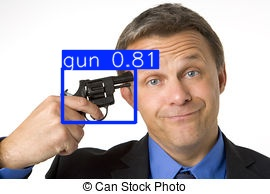

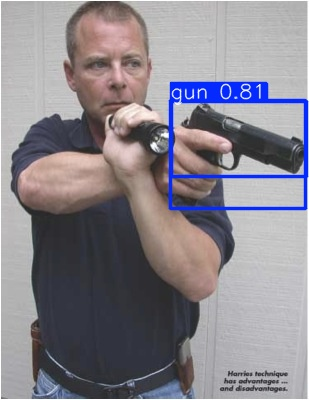

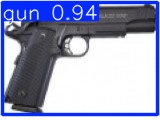

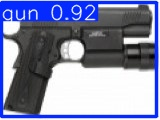

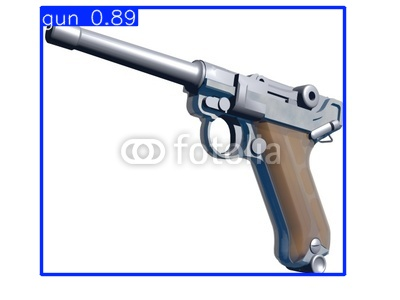

In [32]:
import glob
from IPython.display import Image, display

# Get first 5 images with predictions
val_results = glob.glob('/kaggle/working/ultralytics/runs/detect/gun_detector_val_v8/*.jpg')

for img in val_results[:5]:
    display(Image(filename=img))

## Saving Model's Weights

In [33]:
# Copy the final trained model to a specific location
!cp /kaggle/working/ultralytics/runs/detect/gun_detector_v8_12/weights/best.pt /kaggle/working/best.pt
!cp /kaggle/working/ultralytics/runs/detect/gun_detector_v8_12/weights/last.pt /kaggle/working/last.pt

## Testing on my own Data

In [35]:
!yolo predict model=/kaggle/working/ultralytics/runs/detect/gun_detector_v8_12/weights/best.pt \
  source=/kaggle/input/guntesting/gunTesting \
  imgsz=416 \
  conf=0.25 \
  name=gun_detector_test_v8

Ultralytics 8.3.121 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/6 /kaggle/input/guntesting/gunTesting/gunImage2.jpeg: 256x416 2 guns, 35.5ms
image 2/6 /kaggle/input/guntesting/gunTesting/gunImage3.jpeg: 256x416 1 gun, 6.6ms
image 3/6 /kaggle/input/guntesting/gunTesting/gunImg.jpg: 288x416 (no detections), 35.5ms
image 4/6 /kaggle/input/guntesting/gunTesting/gunTest.jpg: 288x416 2 guns, 6.7ms
image 5/6 /kaggle/input/guntesting/gunTesting/images (1).jpeg: 288x416 9 guns, 6.2ms
image 6/6 /kaggle/input/guntesting/gunTesting/images.jpeg: 256x416 1 gun, 6.9ms
Speed: 1.3ms preprocess, 16.2ms inference, 30.0ms postprocess per image at shape (1, 3, 256, 416)
Results saved to /kaggle/working/ultralytics/runs/detect/gun_detector_test_v8
💡 Learn more at https://docs.ultralytics.com/modes/predict


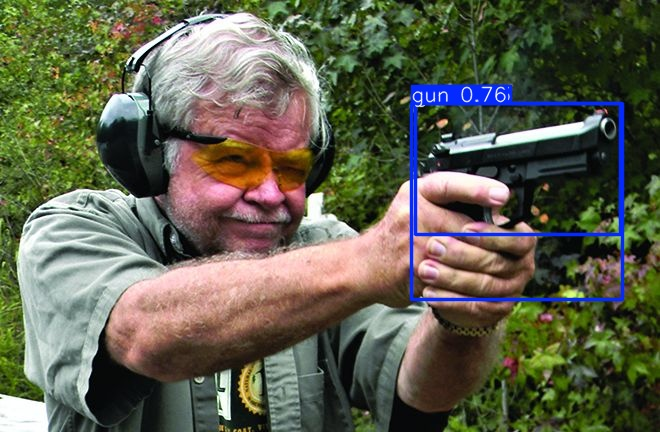

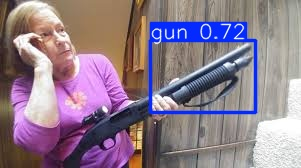

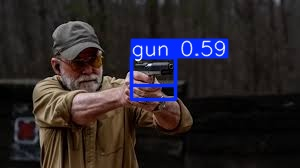

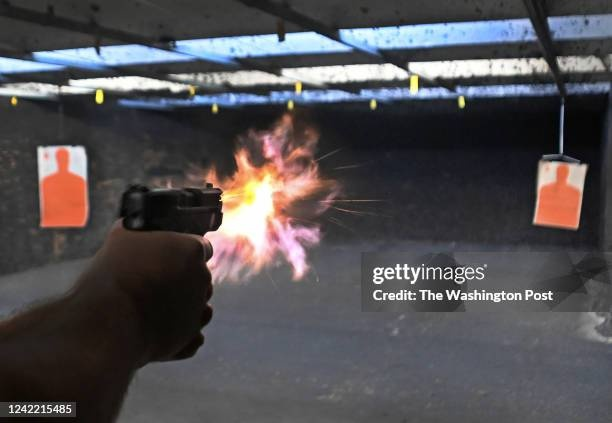

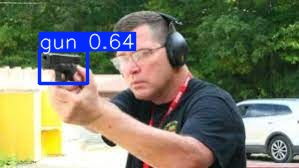

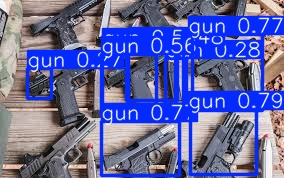

In [36]:
import glob
from IPython.display import Image, display

# Display results from test
result_paths = glob.glob('/kaggle/working/ultralytics/runs/detect/gun_detector_test_v8/*')

for img_path in result_paths:
    display(Image(filename=img_path))